# Random forest

# imports

In [70]:
from sklearn import datasets as ds
from sklearn import model_selection as ms
from sklearn import ensemble as en
from sklearn import metrics as mt
from matplotlib import pyplot as plt
import numpy as np

# load data

In [77]:
x, y = ds.make_classification(
    n_samples=1000,
    n_classes=2, 
    n_features=8,
    n_redundant=3,
    random_state=0
)


In [78]:
x_train, x_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.2, random_state=0)

# model training

In [79]:
# definition
model = en.RandomForestClassifier(
    n_estimators=3,
    max_depth=2,
    random_state=0    
)

# fit
model.fit(x_train, y_train)

# performance
yhat_test = model.predict_proba(x_test)[:, 1]

In [80]:
yhat_test

array([0.16531987, 0.53758997, 0.53758997, 0.53758997, 0.53758997,
       0.57411982, 0.57411982, 0.40833499, 0.52881691, 0.70513847,
       0.37230954, 0.53758997, 0.52881691, 0.57411982, 0.53758997,
       0.57411982, 0.57411982, 0.37230954, 0.57411982, 0.74166832,
       0.57411982, 0.57411982, 0.37230954, 0.32700663, 0.57411982,
       0.32700663, 0.49228707, 0.49228707, 0.57411982, 0.38539755,
       0.57411982, 0.34009464, 0.16531987, 0.57411982, 0.53758997,
       0.53758997, 0.52881691, 0.57049715, 0.37230954, 0.52881691,
       0.52881691, 0.57411982, 0.53758997, 0.57411982, 0.57411982,
       0.57411982, 0.32700663, 0.57411982, 0.57411982, 0.37230954,
       0.53758997, 0.32700663, 0.53758997, 0.57411982, 0.57411982,
       0.57411982, 0.52881691, 0.74166832, 0.57411982, 0.57411982,
       0.32700663, 0.52881691, 0.49228707, 0.57411982, 0.57411982,
       0.53758997, 0.57411982, 0.70513847, 0.53758997, 0.53758997,
       0.52881691, 0.57411982, 0.40833499, 0.57411982, 0.53758

# ROC curve

In [81]:
fpr, tpr, th = mt.roc_curve(y_test, yhat_test)

Text(0, 0.5, 'TPR')

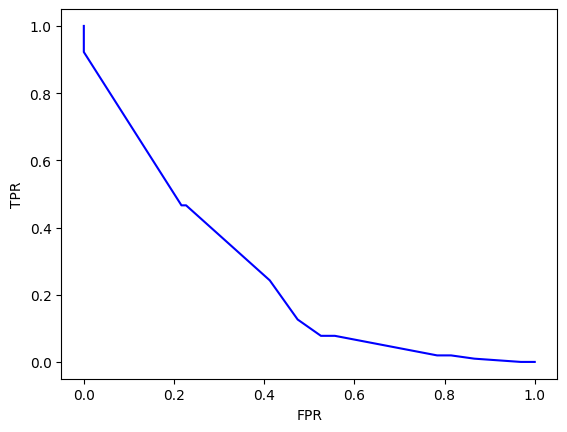

In [82]:
plt.plot(fpr, 1-tpr, color='b')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [83]:
distances = np.sqrt((1-tpr)**2 + fpr**2)

In [84]:
distances

array([1.        , 0.98058252, 0.9223301 , 0.51385223, 0.51828005,
       0.47849994, 0.49073509, 0.53147913, 0.55188455, 0.5620931 ,
       0.78374573, 0.80435812, 0.81466443, 0.8660338 , 0.96907216,
       1.        ])

In [85]:
best_th = th[np.argmin(distances)]
print(f'best thresholds', best_th)

best thresholds 0.5375899709233042


In [86]:
yhat_test = (yhat_test >= best_th).astype(int)

acc = mt.accuracy_score(y_test, yhat_test)
print(f'accuracy', acc)

accuracy 0.675


In [87]:
model.feature_importances_

array([0.20274717, 0.        , 0.        , 0.06863601, 0.03965781,
       0.        , 0.        , 0.68895901])